In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

from tqdm import tqdm
tqdm._instances.clear()

# 2D Denoiser data creation

In [2]:
import numpy as np

from sklearn.model_selection import train_test_split
import os

month ="JanFeb"
ANT = ["ant1", "ant2", "ant3"]
for ant in ANT:
    print(f"Loading {ant} Data")
    DataDir = f"/mnt/janus/arehman/work/2023_Split_months_data-Final/TrainingData_V3/{month}"

    ns_ch0 = np.load(DataDir + f"/ConcatinatedData/{ant}ch0_AllSigPlusNoise.npz")
    ns_ch0 = ns_ch0["arr_0"]
    ns_ch1 = np.load(DataDir + f"/ConcatinatedData/{ant}ch1_AllSigPlusNoise.npz")
    ns_ch1 = ns_ch1["arr_0"]
    
    sig_ch0 = np.load(DataDir + f"/ConcatinatedData/{ant}ch0_AllSignals.npz")
    sig_ch0 = sig_ch0["arr_0"]
    sig_ch1 = np.load(DataDir + f"/ConcatinatedData/{ant}ch1_AllSignals.npz")
    sig_ch1 = sig_ch1["arr_0"]
    
    ####################################################################################################
#     ## To include few background only waveforms for denoiser training
#     no_ch0 = np.load(DataDir + f"/ConcatinatedData/{ant}ch0_AllNoiseOnly.npz")
#     no_ch0 = no_ch0["arr_0"][:20000]
#     no_ch1 = np.load(DataDir + f"/ConcatinatedData/{ant}ch1_AllNoiseOnly.npz")
#     no_ch1 = no_ch1["arr_0"][:20000]
    
#     ## Make zeros to use them as labels
#     zeros = np.array([np.zeros(len(no_ch0[i])) for i in range(len(no_ch0))])    
    
#     ## Concatinate the noisy and noise only traces
#     ## Channel_0
#     ns_ch0 = np.concatenate( (ns_ch0, no_ch0) )
#     sig_ch0 = np.concatenate( (sig_ch0, zeros) )
#     ## Channel_1
#     ns_ch1 = np.concatenate( (ns_ch1, no_ch1) )
#     sig_ch1 = np.concatenate( (sig_ch1, zeros) )
    ####################################################################################################
    print(f"Initial shapes = sig: {sig_ch0.shape}, sig_noise: {ns_ch0.shape}")

    sig_only = np.stack([sig_ch0, sig_ch1], axis=2) ### Combine two channels to make an event 
    sig_noise = np.stack([ns_ch0, ns_ch1], axis=2)


    print(f"Concate shape Sig_noise = {sig_noise.shape} and signals only = {sig_only.shape}")
    
    del ns_ch0, ns_ch1, sig_ch0, sig_ch1
    
    ## Split the test and train data
    Traces_train, Traces_test, labels_train, labels_test= train_test_split(sig_noise,
                                                                 sig_only,
                                                                 random_state=42,
                                                                 test_size=0.2)

    print("Saving tstTrain data")
    Outpath = DataDir + "/2D_CNN/Denoiser/TstTrn"
    if not os.path.exists(Outpath):
        os.makedirs(Outpath)
        
    np.save(Outpath + f"/{ant}_Noisy_train.npy", Traces_train)
    np.save(Outpath + f"/{ant}_Noisy_test.npy", Traces_test)
    np.save(Outpath + f"/{ant}_Signals_train.npy", labels_train)
    np.save(Outpath + f"/{ant}_Signals_test.npy", labels_test)
    
    del Traces_train, Traces_test, labels_train, labels_test

Loading ant1 Data
Initial shapes = sig: (137737, 1000), sig_noise: (137737, 1000)
Concate shape Sig_noise = (137737, 1000, 2) and signals only = (137737, 1000, 2)
Saving tstTrain data
Loading ant2 Data
Initial shapes = sig: (137735, 1000), sig_noise: (137735, 1000)
Concate shape Sig_noise = (137735, 1000, 2) and signals only = (137735, 1000, 2)
Saving tstTrain data
Loading ant3 Data
Initial shapes = sig: (137732, 1000), sig_noise: (137732, 1000)
Concate shape Sig_noise = (137732, 1000, 2) and signals only = (137732, 1000, 2)
Saving tstTrain data


# 2D Clasifier data creation

In [3]:
# month ="JanFeb"

ANT = ["ant1", "ant2", "ant3"]
for ant in tqdm(ANT):
    print(f"Loading {ant} Data")
    DataDir = f"/mnt/janus/arehman/work/2023_Split_months_data-Final/TrainingData_V3/{month}"

    ns_ch0 = np.load(DataDir + f"/ConcatinatedData/{ant}ch0_AllSigPlusNoise.npz")
    ns_ch0 = ns_ch0["arr_0"]
    ns_ch1 = np.load(DataDir + f"/ConcatinatedData/{ant}ch1_AllSigPlusNoise.npz")
    ns_ch1 = ns_ch1["arr_0"]
    
    no_ch0 = np.load(DataDir + f"/ConcatinatedData/{ant}ch0_AllNoiseOnly.npz")
    no_ch0 = no_ch0["arr_0"]
    no_ch1 = np.load(DataDir + f"/ConcatinatedData/{ant}ch1_AllNoiseOnly.npz")
    no_ch1 = no_ch1["arr_0"]

    print(f"Initial shapes = sig: {ns_ch0.shape}, noise: {no_ch0.shape}")

    noise_only = np.stack([no_ch0, no_ch1], axis=2) ### Combine two channels to make an event 
    sig_noise = np.stack([ns_ch0, ns_ch1], axis=2)


    print(f"Concate shape Sig_noise = {sig_noise.shape} and noise only = {noise_only.shape}")
    
    del ns_ch0, ns_ch1, no_ch0, no_ch1
    
    L1 = np.ones(len(sig_noise))
    L2 = np.zeros(len(noise_only))

    Traces = np.concatenate((sig_noise, noise_only))

    Labels = np.concatenate((L1, L2))
    
    del sig_noise, noise_only, L1, L2


    Traces_train, Traces_test, Labels_train, Labels_test = train_test_split(Traces, Labels,
                                                        random_state=42,
                                                        test_size=0.2)
    


    print("Saving tstTrain data")
    Outpath = DataDir + "/2D_CNN/Classifier/TstTrn"
    if not os.path.exists(Outpath):
        os.makedirs(Outpath)
        
    np.save(Outpath + f"/{ant}_Traces_train.npy", Traces_train)
    np.save(Outpath + f"/{ant}_Traces_test.npy", Traces_test)
    np.save(Outpath + f"/{ant}_Labels_train.npy", Labels_train)
    np.save(Outpath + f"/{ant}_Labels_test.npy", Labels_test)
    
    
    del Traces_train, Traces_test, Labels_train, Labels_test

  0%|                                                                                                                   | 0/3 [00:00<?, ?it/s]

Loading ant1 Data
Initial shapes = sig: (137737, 1000), noise: (137737, 1000)
Concate shape Sig_noise = (137737, 1000, 2) and noise only = (137737, 1000, 2)
Saving tstTrain data


 33%|███████████████████████████████████▎                                                                      | 1/3 [01:58<03:56, 118.03s/it]

Loading ant2 Data
Initial shapes = sig: (137735, 1000), noise: (137735, 1000)
Concate shape Sig_noise = (137735, 1000, 2) and noise only = (137735, 1000, 2)
Saving tstTrain data


 67%|██████████████████████████████████████████████████████████████████████▋                                   | 2/3 [03:32<01:44, 104.45s/it]

Loading ant3 Data
Initial shapes = sig: (137732, 1000), noise: (137732, 1000)
Concate shape Sig_noise = (137732, 1000, 2) and noise only = (137732, 1000, 2)
Saving tstTrain data


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [05:05<00:00, 101.91s/it]


# 2D Validation data creation

In [1]:
import numpy as np
import os

month ="MayJune_Validation/V2"
ANT = ["ant1", "ant2", "ant3"]
for ant in ANT:
    print(f"Loading {ant} Data")
    DataDir = f"/mnt/janus/arehman/work/2023_Split_months_data-Final/{month}"

    ns_ch0 = np.load(DataDir + f"/ConcatinatedData/{ant}ch0_AllSigPlusNoise.npz")
    ns_ch0 = ns_ch0["arr_0"]
    ns_ch1 = np.load(DataDir + f"/ConcatinatedData/{ant}ch1_AllSigPlusNoise.npz")
    ns_ch1 = ns_ch1["arr_0"]
    
    sig_ch0 = np.load(DataDir + f"/ConcatinatedData/{ant}ch0_AllSignals.npz")
    sig_ch0 = sig_ch0["arr_0"]
    sig_ch1 = np.load(DataDir + f"/ConcatinatedData/{ant}ch1_AllSignals.npz")
    sig_ch1 = sig_ch1["arr_0"]

    no_ch0 = np.load(DataDir + f"/ConcatinatedData/{ant}ch0_AllNoiseOnly.npz")
    no_ch0 = no_ch0["arr_0"]
    no_ch1 = np.load(DataDir + f"/ConcatinatedData/{ant}ch1_AllNoiseOnly.npz")
    no_ch1 = no_ch1["arr_0"]

    print(f"Initial shapes = sig: {sig_ch0.shape}, sig_noise: {ns_ch0.shape}, noise: {no_ch0.shape}")
    
    ### Combine two channels to make an event
    sig_only = np.stack([sig_ch0[:60000], sig_ch1[:60000]], axis=2)  
    noise_only = np.stack([no_ch0[:60000], no_ch1[:60000]], axis=2)
    sig_noise = np.stack([ns_ch0[:60000], ns_ch1[:60000]], axis=2)


    print(f"Concate shape Sig_noise = {sig_noise.shape} and signals only = {sig_only.shape} and noise only = {noise_only.shape}")
    
    del ns_ch0, ns_ch1, sig_ch0, sig_ch1, no_ch0, no_ch1
    
    ## Saving Data
    print("Saving Validation data")
    Outpath = DataDir + "/Data"
    if not os.path.exists(Outpath):
        os.makedirs(Outpath)
        
    np.save(Outpath + f"/{ant}_Noisy.npy", sig_noise)
    np.save(Outpath + f"/{ant}_NoiseOnly.npy", noise_only)
    np.save(Outpath + f"/{ant}_Signals.npy", sig_only)
    
    del sig_noise, noise_only, sig_only

Loading ant1 Data
Initial shapes = sig: (110675, 1000), sig_noise: (110675, 1000), noise: (110675, 1000)
Concate shape Sig_noise = (60000, 1000, 2) and signals only = (60000, 1000, 2) and noise only = (60000, 1000, 2)
Saving Validation data
Loading ant2 Data
Initial shapes = sig: (110671, 1000), sig_noise: (110671, 1000), noise: (110671, 1000)
Concate shape Sig_noise = (60000, 1000, 2) and signals only = (60000, 1000, 2) and noise only = (60000, 1000, 2)
Saving Validation data
Loading ant3 Data
Initial shapes = sig: (110668, 1000), sig_noise: (110668, 1000), noise: (110668, 1000)
Concate shape Sig_noise = (60000, 1000, 2) and signals only = (60000, 1000, 2) and noise only = (60000, 1000, 2)
Saving Validation data


In [3]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 100

ant = "ant1"
DataDir = f"/mnt/janus/arehman/work/2023_Split_months_data-Final/JanFeb"

Outpath = DataDir + "/2D_CNN/Denoiser/TstTrn"

Noisy = np.load(Outpath + f"/{ant}_Noisy_test.npy")
Signals = np.load(Outpath + f"/{ant}_Signals_train.npy")

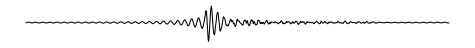

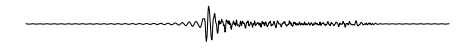

In [26]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 50

Indx = 4

plt.figure(figsize=(12, 1))
plt.axis('off')
plt.plot(Signals[:, :, 0][Indx], 'k')
# plt.xlim(300, 400)
plt.figure(figsize=(12, 1))
plt.plot(Signals[:, :, 1][Indx], 'k')
plt.axis('off');

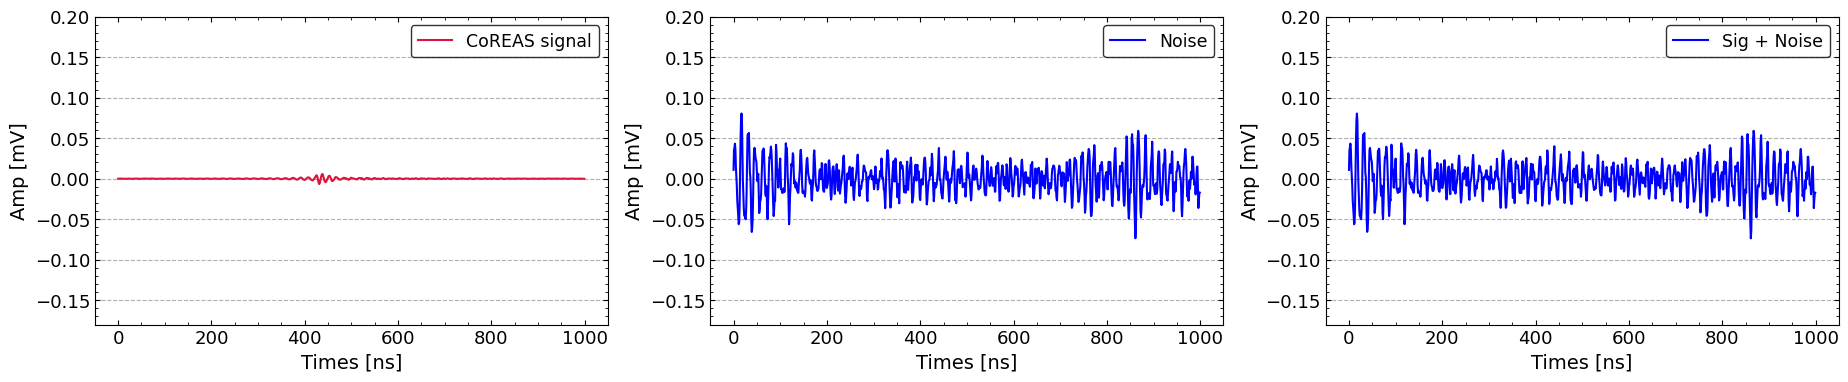

In [11]:
i = 4


def Plot_rc(ax):
    ax.set_xlabel("Times [ns]",fontsize =14)
    ax.set_ylabel("Amp [mV]",fontsize =14)
    # ax.tick_params(axis='x', which='minor', bottom=True)
    plt.minorticks_on()
    ax.tick_params(axis='both', which='both', direction='in',labelsize=13)
    ax.yaxis.grid(linestyle="--")
    ax.set_ylim(-0.18, 0.20)
    ax.legend(loc='best', prop={'size': 12.5}, edgecolor='black')


    
NRows, NCols = 1, 3
gs = gridspec.GridSpec(NRows, NCols, wspace=0.2, hspace=0.5)
fig = plt.figure(figsize=(7.5*NCols, 4*NRows))


ax = fig.add_subplot(gs[0])
ax.plot(Signals[:, :, 0][i]/1e-12, c='crimson', label="CoREAS signal")
Plot_rc(ax)
plt.minorticks_on()
ax.tick_params(axis='both', which='both', direction='in',labelsize=13)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

ax = fig.add_subplot(gs[1])
Noise = np.array(Noisy[:, :, 0][i] - Signals[:, :, 0][i])/1e-12
ax.plot(Noise, c='blue', label="Noise")
Plot_rc(ax)
plt.minorticks_on()
ax.tick_params(axis='both', which='both', direction='in',labelsize=13)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

ax = fig.add_subplot(gs[2])
ax.plot(Noisy[:, :, 0][i]/1e-12, c='blue', label="Sig + Noise")
Plot_rc(ax)

plt.minorticks_on()
ax.tick_params(axis='both', which='both', direction='in',labelsize=13)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

# plt.savefig('./Training_traces_examples.png' , bbox_inches='tight', dpi=300);
# plt.savefig('./Training_traces_examples.pdf' , bbox_inches='tight');